<a href="https://colab.research.google.com/github/ekdlakdl12/intel/blob/main/1PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 기본제공 datasets 이용
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 프레임으로 만들기

#sepal_length : 꽃받침 길이  sepal_width : 꽃받침 너비
#petal_length : 꽃잎 길이    petal_width : 꽃잎 너비

iris = load_iris()

columns = ['sepal_length', 'wepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target

print(irisDF.head()) #모양확인
print(irisDF.drop('target', axis=1).shape)

   sepal_length  wepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
(150, 4)


In [3]:
# 분석하기좋게 전처리
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.drop('target', axis=1))

In [4]:
# PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정 
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [6]:
# 칼럼 변경
pca_columns = ['pca_1', 'pca_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca['target'] = irisDF_pca['target'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})
irisDF_pca.head()

,pca_1,pca_2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


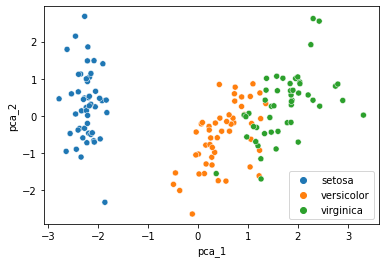

In [7]:
#setosa 부채붓꽃
#versicolor 아이리스 버시칼라
#virginca아이리스 버지니카

# 시각화
sns.scatterplot(data=irisDF_pca, x="pca_1", y="pca_2", hue="target")
plt.legend()
plt.show()

In [8]:
# 데이터 반영 비율 확인
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)) # 96% 데이터손실이 거의없음

[0.72962445 0.22850762] 0.9581320720000165
